<a href="https://colab.research.google.com/github/Amansaini123/Final-Projects/blob/master/F5C_IMage_Caption_Bot_Genrative_Adversarial_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Genrative deep learning involve creating models that can create new data
# and one special type on model that we will build is known as GAN(genrative Adversarial Network)
# Idea of GAN is proposed by Ian goodfellow in 2014
# Most of the models we have build till now are Discriminative models(Predict Y from X) excpet the markov chain which is generative (Predict X from Y)
# What discriminative model does is find the optimal hyper plane between classes and find the P(Y/X) based on that hyperplane
# Here we will consider what is the probabilty of X given Y i.e P(X,Y)
# Here our task would be say Generate a email which look like a spam
# Neural Networks can be used in both i.e genrating a Discriminative and Generative Model
# Till now we were calculating P(Y/X) and now here we are finding P(X/Y)



# Till now we only know the difference between lion and elephant by seeing the features present to differnciate 
# But now we will build a lion and then match with both and say that this is a lion and other one is not
# Both the models are doing the same job but the way of learning is different

# The goal in genrative model P(X/Y) say X is marks and Y is physics and maths so here we will have all the physics and maths marks






import numpy as np
import matplotlib.pyplot as plt


# This is our standard normal distribution with 0 mean and unit varience i.e u=0 and sigma=1
# But say here in the case of physics we want mean =80 and sigma=10 so,X-u/sigma 
# Say maths st=20 and maths mean is 40
# np.round for making everything as integer

phy_std=5
phy_mean=80
phy=np.round(np.random.randn(500)*phy_std+phy_mean)
math=np.round(np.random.randn(500)*10+40)





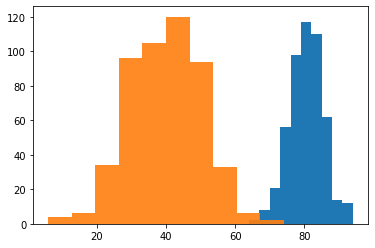

In [2]:
plt.hist(phy)
plt.hist(math,alpha=0.9)
plt.show()

In [3]:
# Now in Gan by seeing the graph we have to predict the function 
# this same can be done for images i.e pixel values can also be ploted on a graph



# We will learn what values (Marks) the X can take if Y is a certain class


# For genrating the GAN we use two neural network one is known as Genrator and other is Discriminator
# Say theif is a generator that genrate fake currency but Police is a discriminator that knows the difference between fake and real currency
# So police tell the theif that make the necessary changes in the fake cuureny to make it close to the real currency
# This feedback goes via back propogation , so during this prosses both of these guys get trained
# Hence we will have two neural network one is going to be genrator and other be discriminator



# Generator take input as noise vector, Generate a image which is validated by discriminator
# Discrimiator will throw a probabilty that image is real of fake


# As the training continues both the genrator and discriminator become better by paying min, max game




# We would be using stochastic gradient descent of our dataset 
# i.e sample mini batch of exams from noise prior and then sample mini batch from true data
# And then use stochastic gradient descent or adam to update the weights







In [5]:
# Tricks while Training the GAN
# Instead of 0 and 1 use the inputs between -1 and 1 i.e use tanh as activation function
# Noise vector to the generator initially should be sample in random normal districution i.e use randn funtion for this

# We do not want that while backpropogation our value become zero , it can be a very small value but we dont want to be 0 
# Hence instead of relu we use leak relu 
# Use adam as optimezer
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation


# In both gradient descent (GD) and stochastic gradient descent (SGD), you update a set of parameters in an iterative manner to minimize an error function.

# While in GD, you have to run through ALL the samples in your training set to do a single update 
# for a parameter in a particular iteration, in SGD, on the other hand, you use ONLY ONE or SUBSET 
# of training sample from your training set to do the update for a parameter in a particular iteration.
#  If you use SUBSET, it is called Minibatch Stochastic gradient Descent.

from keras.datasets import mnist
from keras.layers import *
from keras.layers import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam



import numpy as np
import matplotlib.pyplot as plt
import math















Using TensorFlow backend.


In [6]:
# We only need the training data

(X_train,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [7]:
print(X_train.shape)

(60000, 28, 28)


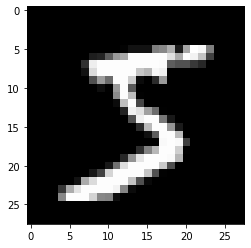

In [8]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [9]:
# Now we will normalize the data in the range of [-1 to 1]


# Converting integer value to float and then subtracting the middle most value from it i.e we have all the pixels in the range of 0 to 255
X_train=(X_train.astype('float32')-127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))



# We can see that maximum value is 1 and minimum value is -1 
# Hence the data has been normalized

-1.0
1.0


In [10]:
# The Adam optimization algorithm is an extension to stochastic gradient descent
#  that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.



TOTAL_EPOCHS=50


# How many images we are going to pass through discriminator in each batch
BATCH_SIZE=256


# In one epoch how much data will pass through discriminator ie no of images divided by batch size i.e number of mini batches
NO_OF_BATCHES=int(X_train.shape[0]/BATCH_SIZE)


# We would pick 128 fake samples and 128 real sample to the discriminator
HALF_BATCH=128


# Let say we have 100 dimensional noise which will be converted to 784 dimension vector which will for our 28*28 image
NOISE_DIM=100


# Learning rate(lr) , i.e we should use these as our defalut parameters
# lr is basically the step_size of the algorithm 
# beta is the exponential decay of the algorithm
adam=Adam(lr=2e-4,beta_1=0.5)






In [11]:
# Now we should build our generator and discrimator part


# Generator which inputs a noise which is 100 dimensional and outputs the vector which is 784 dimension
# Its going to be a neural network


# linear sequence of layers is the property of sequential model
generator=Sequential()


# Add 256 neurons to the first layer and input is 100 inputs
generator.add(Dense(256,input_shape=(NOISE_DIM,)))

# Now we will add the activation which is leaky relu
# 0.2 is the value of alpha i.e when x is neagtive it will not give exact 0 it will give aplha*x
generator.add(LeakyReLU(0.2))


# Now we are adding another Dense layer that upscale from 256 to 512 dimensions and then another Leaky relu
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))




# Repeating the Process and just doubling the neurons
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))



# We want final output to be 784 dimension with a activation of tanh Range of tanh is between -1 to 1
generator.add(Dense(784,activation='tanh'))


# Lets complie our model and loss will be our binary cross entropy as image can be real or fake we have only two options
# If we are training a binary classifier chances are that we would be using binary cross entropy or log loss function

generator.compile(loss='binary_crossentropy',optimizer='adam')


generator.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [12]:
# We have used leaky relu as activation in all the middle layers and tanh as the activation in the last layer



# Now lets us build the discriminator
# Later on we will club both of these into one model
discriminator=Sequential()

# Input here is 784 dimension we squeze it to 512 dimension i.e we are doing down sampling i.e comverting Large vector to small
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))



discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))


# Here we have activation as sigmoid as binary classification i.e fake or not fake say
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.add(LeakyReLU(0.2))


discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1)                 0         
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [13]:
# We can see we have 533,505 parameters in the discriminator

# Now we will combine both generator and discriminator
# When generator is working discriminator is paused and also vice versa
# Hence firslty making discriminator as non trainable


discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))

# Input is passed to the generator and that gives us the generated image 
generated_img=generator(gan_input)


# and the generated_img is passed to the discriminator
gan_output=discriminator(generated_img)



model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)



In [21]:
X_train=X_train.reshape(-1,784)
print(X_train.shape)

(60000, 784)


In [23]:
# Training Loop
# Now lets wirte the training loop 
# Training is not that simple we cannot write the fit function directly
# As training is based on min max model


d_losses = []
g_losses = []


for epoch in range(TOTAL_EPOCHS):
    # For each epoch we have to calculate the genrator loss and the discrimator loss in the each epoch
    # Firslty initialzing both of them as 0
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(NO_OF_BATCHES):
      # In each batch first step would be to train the discriminator
      # And to train the discriminator we need 50 percent real data and 50 percent fake data

      # So we are randomly taking half of the values from our data set 
      # randint take the low value i.e 0 , high value i.e X_train.shape and number of images i.e 128

      # Real Data
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        # Real Data X
        # numpy.random.randint(low, high=None, size=None, dtype=int)¶
        #  So we are randomly taking half of the values from our data set 
        # randint take the low value i.e 0 , high value i.e X_train.shape and number of images i.e 128
        idx = np.random.randint(0,X_train.shape[0],HALF_BATCH)
        real_imgs = X_train[idx]
        
        #Fake Data X
        # Number of images are equal to HALF_BATCH and shape would be equal to NOISE_DIM
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward 
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        # We get the X values we get the y values now we have to train our discriminator
        # According to the paper we will train on both the batches seprately 
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.6819 Generator Loss 1.5885
Epoch 2 Disc Loss 0.6648 Generator Loss 1.5903
Epoch 3 Disc Loss 0.6228 Generator Loss 1.6468
Epoch 4 Disc Loss 0.6564 Generator Loss 1.8389
Epoch 5 Disc Loss 0.5574 Generator Loss 1.9064


OSError: ignored

In [16]:





  for step in range(NO_OF_BATCHES):
    # In each batch first step would be to train the discriminator
    # And to train the discriminator we need 50 percent real data and 50 percent fake data

    # So we are randomly taking half of the values from our data set 
    # randint take the low value i.e 0 , high value i.e X_train.shape and number of images i.e 128

    # Real Data
    idx=np.random.randint(0,X_train.shape[0],128)
    real_imgs=X_train[idx]
    

    # Fake data
    # Number of images are equal to HALF_BATCH and shape would be equal to NOISE_DIM
    noise=np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))

    # We are not using the fit function instead we are using the predict function as it will also the forward pass
    fake_imgs=generator.predict(noise)

    
    # What we have got so far is real data of X and fake data of X
    # Now we also need the labels
    # We have half_batch _size rows and 1 cols and every col is multiplied by 0.9
    real_y=np.ones((HALF_BATCH,1))*0.9
    fake_y=np.zeros((HALF_BATCH,1))



    # We get the X values we get the y values now we have to train our discriminator
    # According to the paper we will train on both the batches seprately 

    d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)


    # Giving equal weightage to both the loss
    d_loss=0.5*d_loss_real+0.5*d_loss_fake

    epoch_d_loss+=d_loss



    # Train the generator considering forzen discriminator
    noise=np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))

    # We want all the y to be 1 i.e we want generator should always generate real images
    ground_truth_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss+=g_loss
  

  # After every 5 epoch we are going to store our generator object
  if(epoch+1)%5==0:
    generator.save('model/gan_generator_{0}.h5'.format(epoch+1))




# Generator genrates 128 images by taking 128 imput vectors and discrimitor take these 128 images along with 128 random images and find the loss



IndentationError: ignored